In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from deepcardio_utils import ImageReader, get_mask, plot_cell

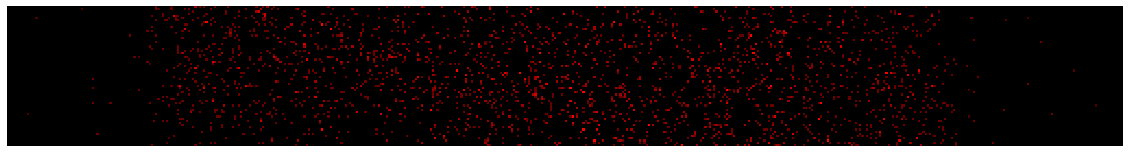

(2500, 64, 512, 3)


In [2]:
imageReader = ImageReader(imageId='Leif_02_01')
images = imageReader.get_full_images()
imageReader.plot_img(0)
print(images.shape)

### Lectura sparks

In [3]:
confsDF, detSparksDF = imageReader.get_spark_simple_data()
detSparksDF

,ID,Xpix,Ypix,Tframe,Tframe,dist2memb,dist2closest,AMP,amp,BL,RoR,mass,t2p,FDHM,FWHM,tau,fldr,subfldr,ROI
0,8.0,400.0,34.0,65.0,65.0,2.3226,0.43129,0.91844,0.86634,0.052101,0.036302,16.2781,22.8937,46.4992,1.86790,48.5704,1.0,1.0,1.0
1,1.0,314.0,34.0,982.0,982.0,9.1009,1.74920,1.30940,1.34450,-0.035073,0.040818,35.3853,34.9476,75.5612,1.67690,49.7656,1.0,1.0,2.0
2,9.0,405.0,36.0,1097.0,1097.0,1.9288,0.43129,1.52180,1.07650,0.445250,0.049653,44.5283,21.2168,23.2496,2.26710,40.7918,1.0,1.0,1.0
3,139.0,293.0,40.0,1609.0,1609.0,7.9061,1.74920,0.46841,0.42914,0.039271,0.000470,4.8369,167.2370,17.4372,1.41860,26.6902,1.0,1.0,3.0
4,116.0,412.0,46.0,1876.0,1876.0,1.4768,0.97761,0.60529,0.50467,0.100620,0.012316,8.7405,29.3734,17.4372,0.85861,19.7978,1.0,1.0,1.0
5,10.0,398.0,27.0,2019.0,2019.0,2.3568,0.58305,2.08790,1.27960,0.808250,0.027377,102.8853,46.4324,46.4992,1.93620,60.2575,1.0,1.0,1.0


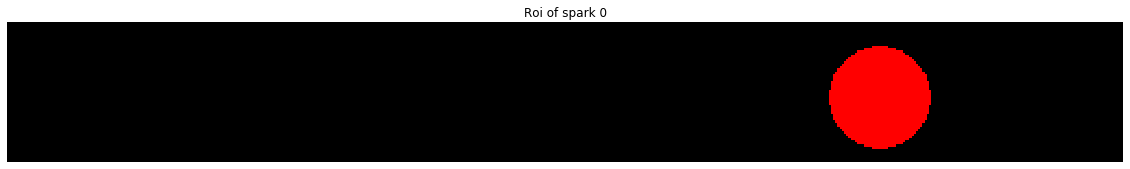

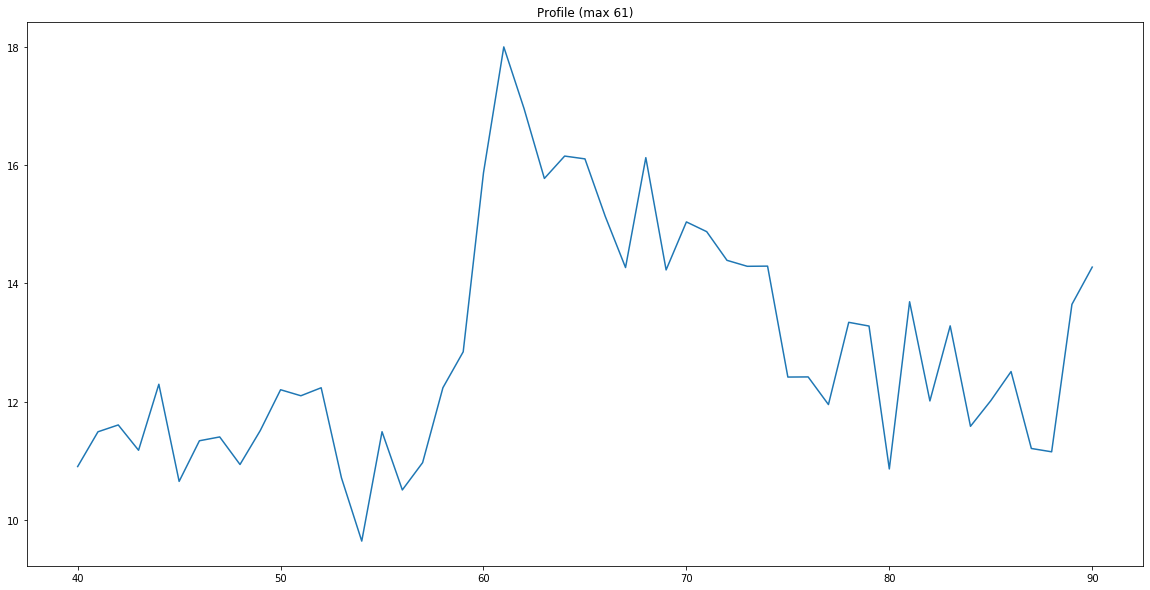

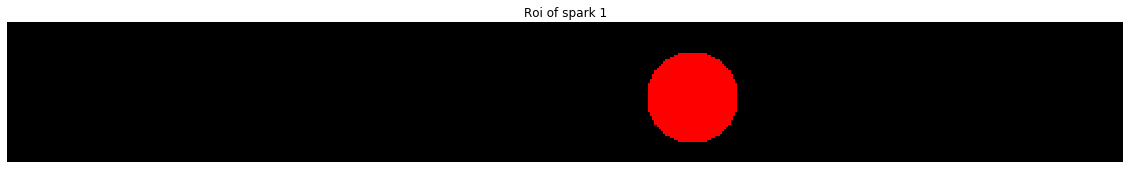

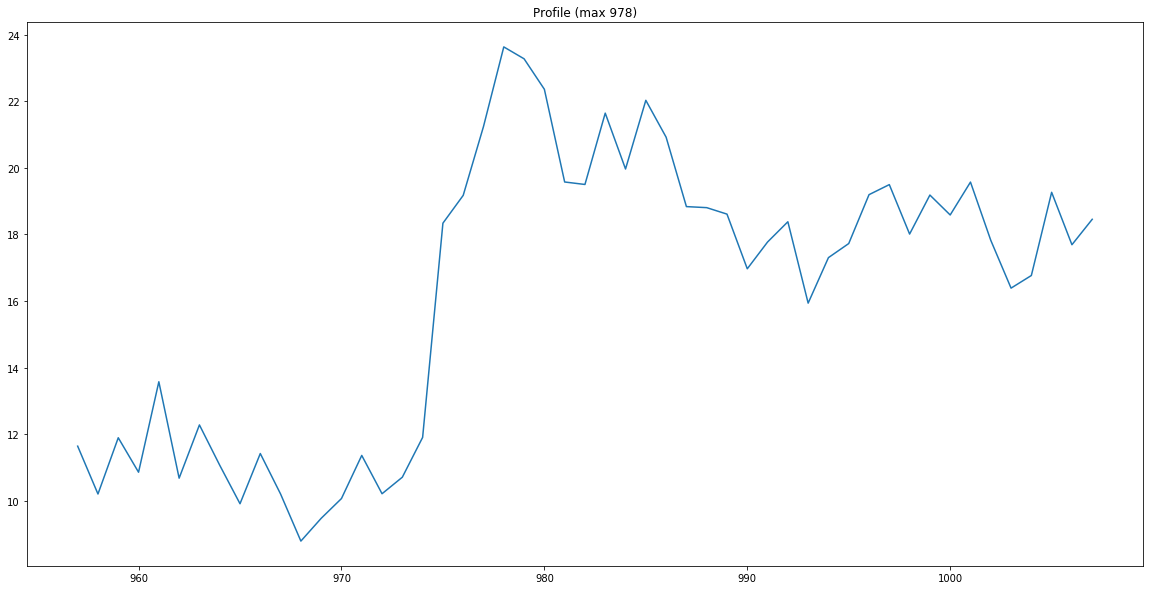

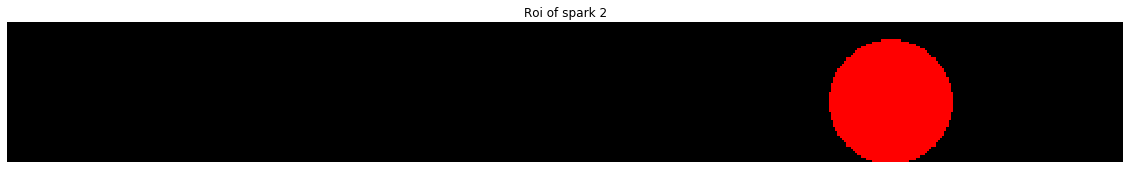

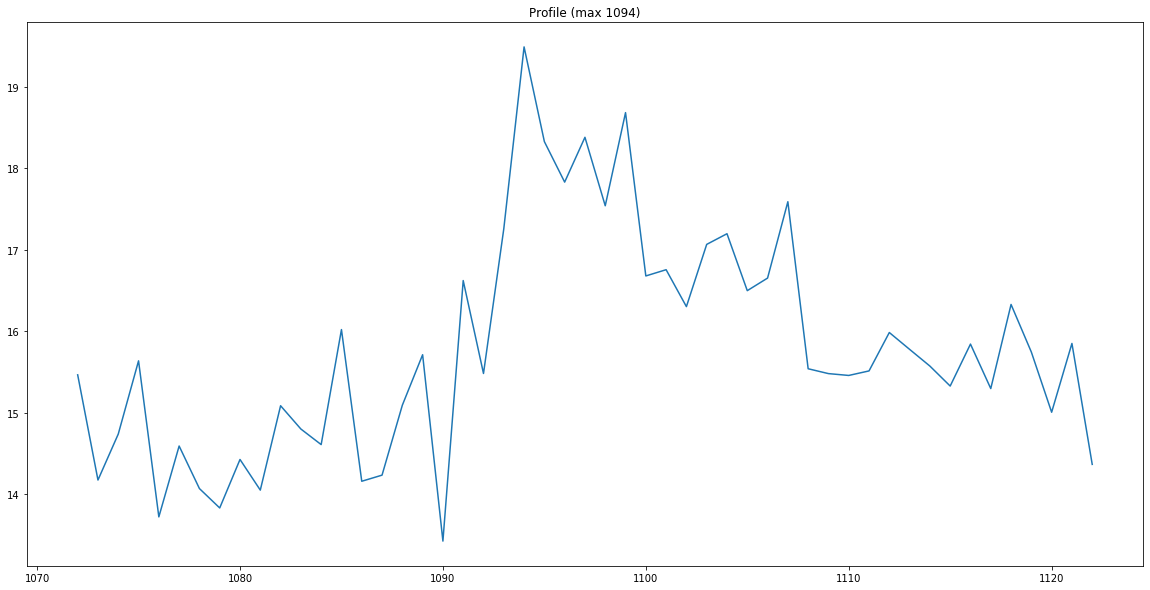

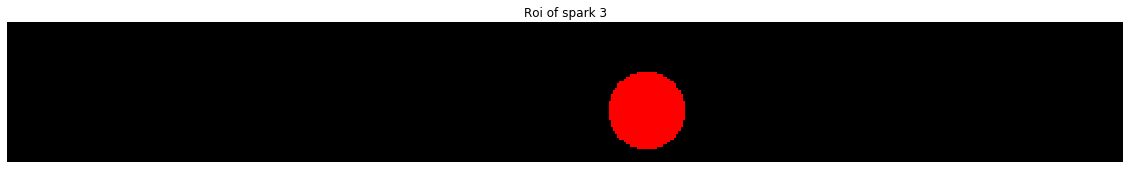

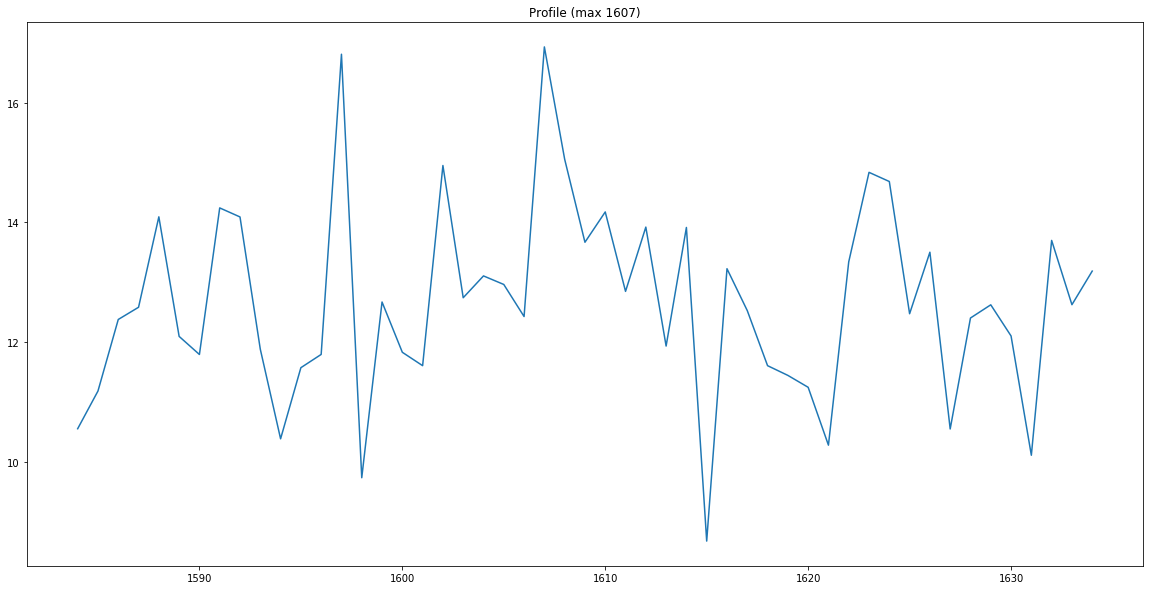

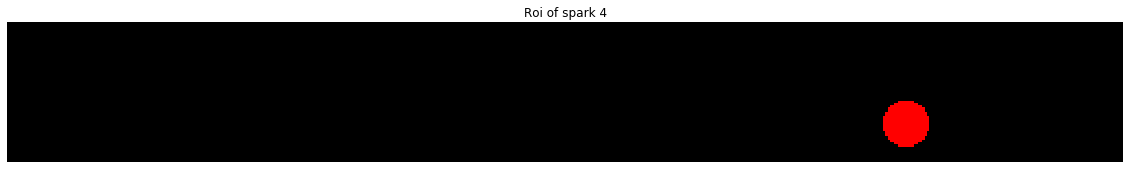

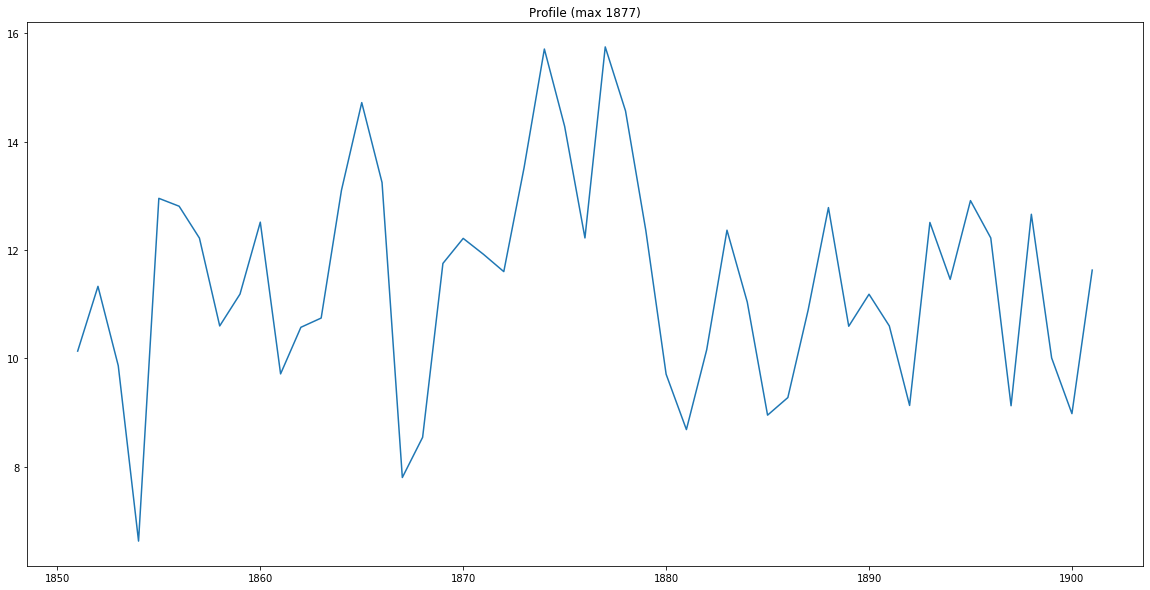

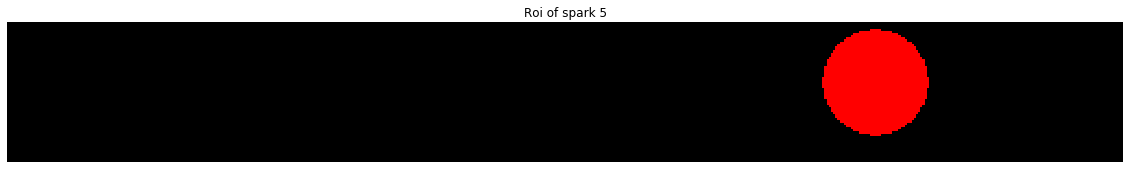

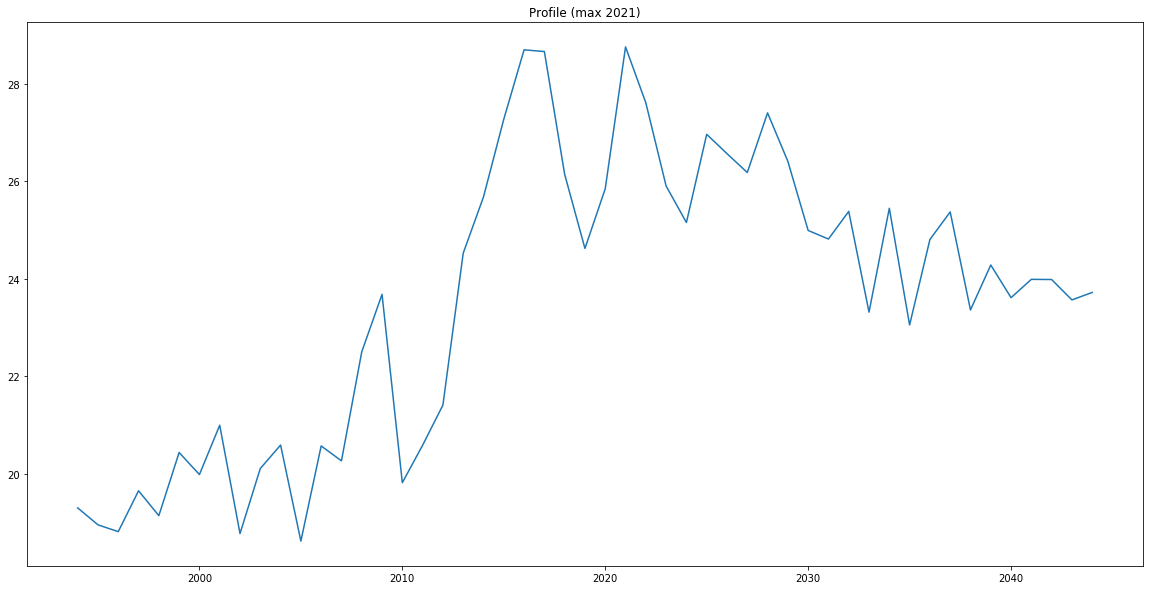

In [8]:
for sparkIdx in range(int(confsDF.loc[0, 'Surviving sparks'])):
    frameIni = int(detSparksDF.loc[sparkIdx, :].tolist()[3]) - 25
    frameFin = int(detSparksDF.loc[sparkIdx, :].tolist()[3]) + 25
    mask = get_mask(images.shape[1], images.shape[2], detSparksDF.loc[sparkIdx, 'Xpix'], detSparksDF.loc[sparkIdx, 'Ypix'], detSparksDF.loc[sparkIdx, 'FWHM']/float(confsDF.loc[:, 'Pixel size(um)']))

    auxImg = np.zeros(images[0].shape)
    auxImg[:, :, 2] = mask*255
    auxImg = auxImg.astype('uint8')
    plot_cell(auxImg, f"Roi of spark {sparkIdx}")

    res = []
    for i in range(frameIni, frameFin+1):
        res.append(images[i][:, :, 2][mask].mean())

    plt.figure(figsize=(20, 10))
    idxs = range(frameIni, frameFin+1)
    plt.plot(idxs, res)
    plt.title(f"Profile (max {idxs[np.argmax(res)]})")
    plt.show()